# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

2. **Perkenalan Dataset**

    Dataset yang digunakan dalam eksperimen ini adalah **Palmer Penguins Dataset**. Dataset ini merupakan alternatif populer dari dataset Iris untuk tugas klasifikasi dan visualisasi data.

    **Detail Dataset:**
    *   **Sumber:** Tersedia melalui library `seaborn` (bersumber dari Dr. Kristen Gorman dan Palmer Station, Antarctica LTER).
    *   **Tujuan:** Melakukan klasifikasi spesies penguin (Adelie, Chinstrap, Gentoo) berdasarkan ukuran tubuh.
    *   **Fitur:**
        *   `species`: Spesies penguin (Target)
        *   `island`: Pulau tempat ditemukan
        *   `bill_length_mm`: Panjang paruh (mm)
        *   `bill_depth_mm`: Kedalaman paruh (mm)
        *   `flipper_length_mm`: Panjang sirip (mm)
        *   `body_mass_g`: Massa tubuh (g)
        *   `sex`: Jenis kelamin


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [18]:
# Library untuk pengolahan data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Preprocessing library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
# Memuat dataset penguins dari library seaborn
df = sns.load_dataset('penguins')

# Menampilkan 5 baris pertama untuk pemeriksaan awal
print("Lima baris pertama dataset:")
display(df.head())

# Memeriksa informasi umum dataset (tipe data dan missing value)
print("\nInformasi Dataset:")
df.info()

Lima baris pertama dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

/tmp/ipython-input-1286216530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='species', palette='pastel')


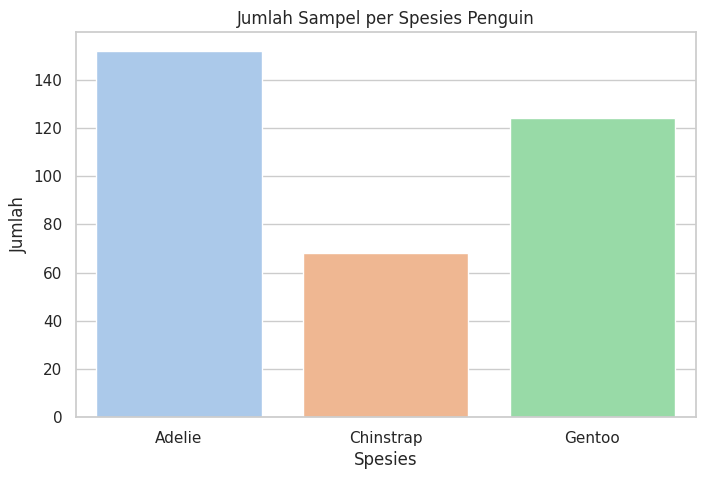

In [20]:
# A. Melihat Distribusi Kelas Target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species', palette='pastel')
plt.title('Jumlah Sampel per Spesies Penguin')
plt.xlabel('Spesies')
plt.ylabel('Jumlah')
plt.show()

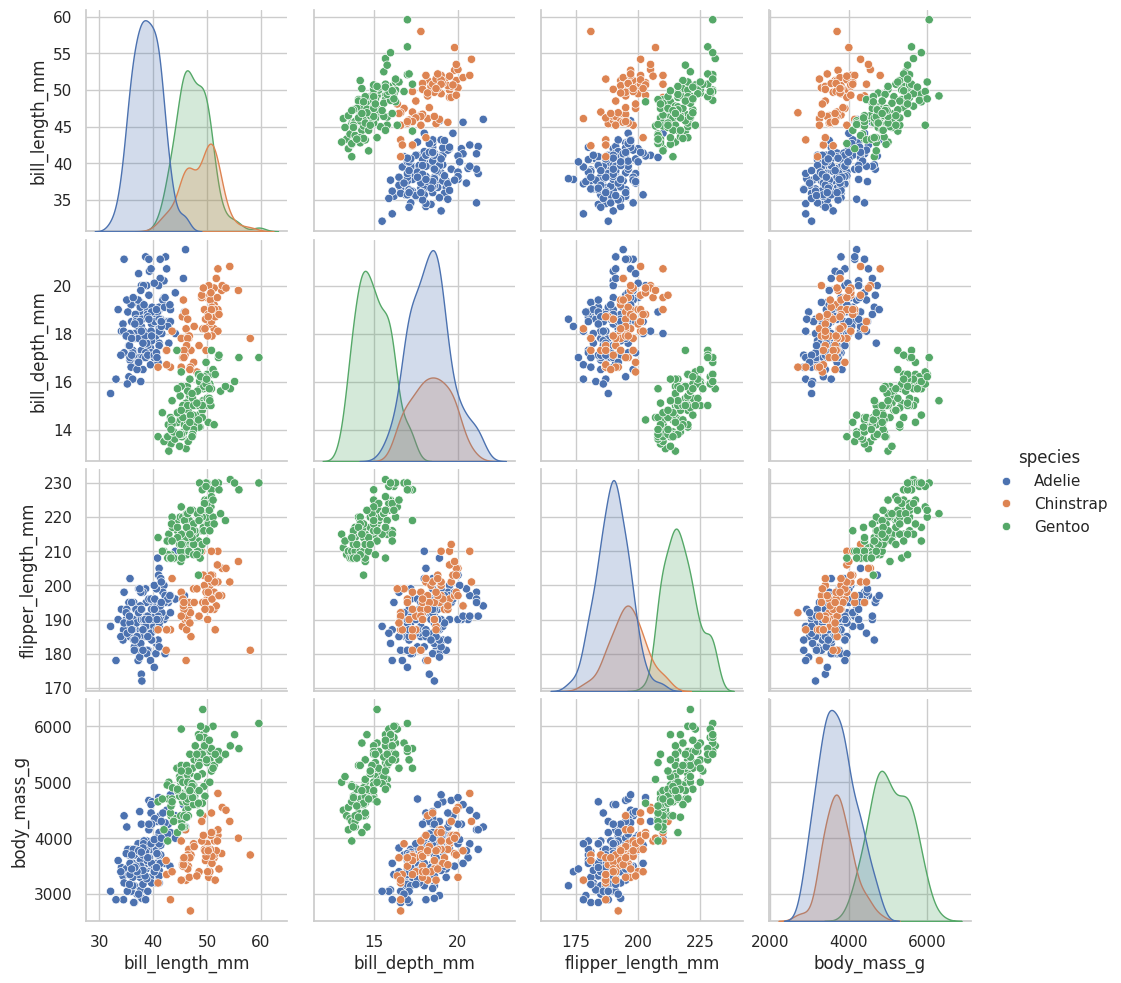

In [21]:
# B. Melihat Hubungan Antar Fitur (Pairplot)
# hue='species' akan memberi warna berbeda untuk setiap spesies
sns.pairplot(df, hue='species', height=2.5)
plt.show()

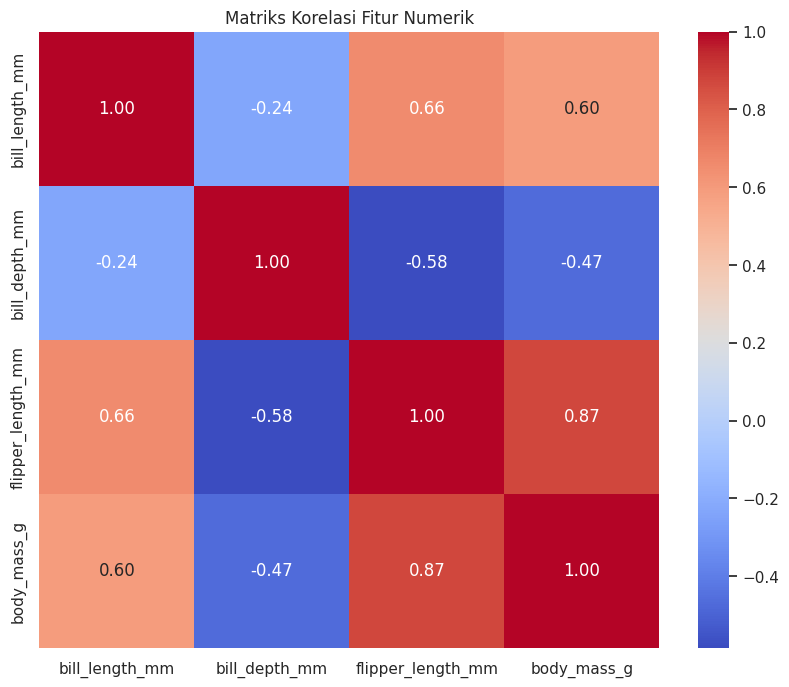

In [22]:
# C. Melihat Korelasi Antar Fitur Numerik
plt.figure(figsize=(10, 8))

# Memilih hanya kolom numerik untuk korelasi
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [23]:
# 5.1 Menangani Data Kosong (Missing Values)

# Cek jumlah missing value per kolom sebelum dibersihkan
print("Jumlah missing value sebelum handling:")
print(df.isnull().sum())

# Strategi: Drop rows (hapus baris) yang mengandung missing value
# Karena jumlah datanya sedikit (hanya beberapa baris), menghapus aman dilakukan.
df_clean = df.dropna()

print("\nJumlah missing value setelah dibersihkan:")
print(df_clean.isnull().sum())

print(f"\nUkuran data awal: {df.shape}")
print(f"Ukuran data setelah dropna: {df_clean.shape}")

Jumlah missing value sebelum handling:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Jumlah missing value setelah dibersihkan:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Ukuran data awal: (344, 7)
Ukuran data setelah dropna: (333, 7)


In [24]:
# 5.2 Encoding Data Kategorikal

# A. Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop(columns=['species'])
y = df_clean['species']

# B. One-Hot Encoding untuk fitur kategorikal (island, sex)
# pd.get_dummies akan otomatis mengubah kolom teks di X menjadi angka biner
X = pd.get_dummies(X, drop_first=True)

# C. Label Encoding untuk Target (species)
# Mengubah Adelie, Chinstrap, Gentoo menjadi 0, 1, 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print("Contoh 5 baris data fitur setelah encoding:")
display(X.head())

print("\nContoh label target setelah encoding (0, 1, 2):")
print(y[:10]) # Menampilkan 10 data pertama

Contoh 5 baris data fitur setelah encoding:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True



Contoh label target setelah encoding (0, 1, 2):
[0 0 0 0 0 0 0 0 0 0]


In [25]:
# 5.3 Pembagian Data Latih dan Uji

# Membagi data: 80% Training, 20% Testing
# random_state=42 memastikan hasil acakan konsisten setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

# Mari kita lihat label di data latih, sekarang pasti sudah teracak
print("\nContoh 10 label di data latih setelah diacak:")
print(y_train[:10])

Jumlah Data Latih: 266
Jumlah Data Uji: 67

Contoh 10 label di data latih setelah diacak:
[2 1 2 0 0 2 2 0 0 2]


In [26]:
# 5.4 Standarisasi Nilai (Scaling)
scaler = StandardScaler()

# Fit hanya pada data TRAINING agar tidak ada kebocoran informasi (data leakage) dari data testing
X_train_scaled = scaler.fit_transform(X_train)

# Aplikasikan scaler yang sama ke data TESTING
X_test_scaled = scaler.transform(X_test)

print("Data berhasil distandarisasi!")
print("Contoh data latih setelah scaling (baris pertama):")
print(X_train_scaled[0])

Data berhasil distandarisasi!
Contoh data latih setelah scaling (baris pertama):
[ 0.16732502 -1.99231135  0.83478089  1.08239437 -0.76994439 -0.41449508
 -1.0461779 ]


## **Simpan Data Mentah (Raw Data)**

In [27]:
# Simpan dataset mentah ke CSV untuk kebutuhan submission
# Kita ambil 'df' yang paling awal (sebelum dropna/encoding)
df.to_csv('penguins_raw.csv', index=False)
print("File 'penguins_raw.csv' berhasil disimpan!")

File 'penguins_raw.csv' berhasil disimpan!
